In [1]:
import pandas as pd
import numpy as np
import missingno as msno
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as plt
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import silhouette_score

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv('../data/marketing_campaign.csv', sep='\t')
data.shape

(2240, 29)

In [3]:
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [5]:
df = data.copy()
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


## Clean data

In [6]:
# convert the Dt_Customer to datatime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], format="%d-%m-%Y")
df["Dt_Customer"]

0      2012-09-04
1      2014-03-08
2      2013-08-21
3      2014-02-10
4      2014-01-19
          ...    
2235   2013-06-13
2236   2014-06-10
2237   2014-01-25
2238   2014-01-24
2239   2012-10-15
Name: Dt_Customer, Length: 2240, dtype: datetime64[ns]

<Axes: >

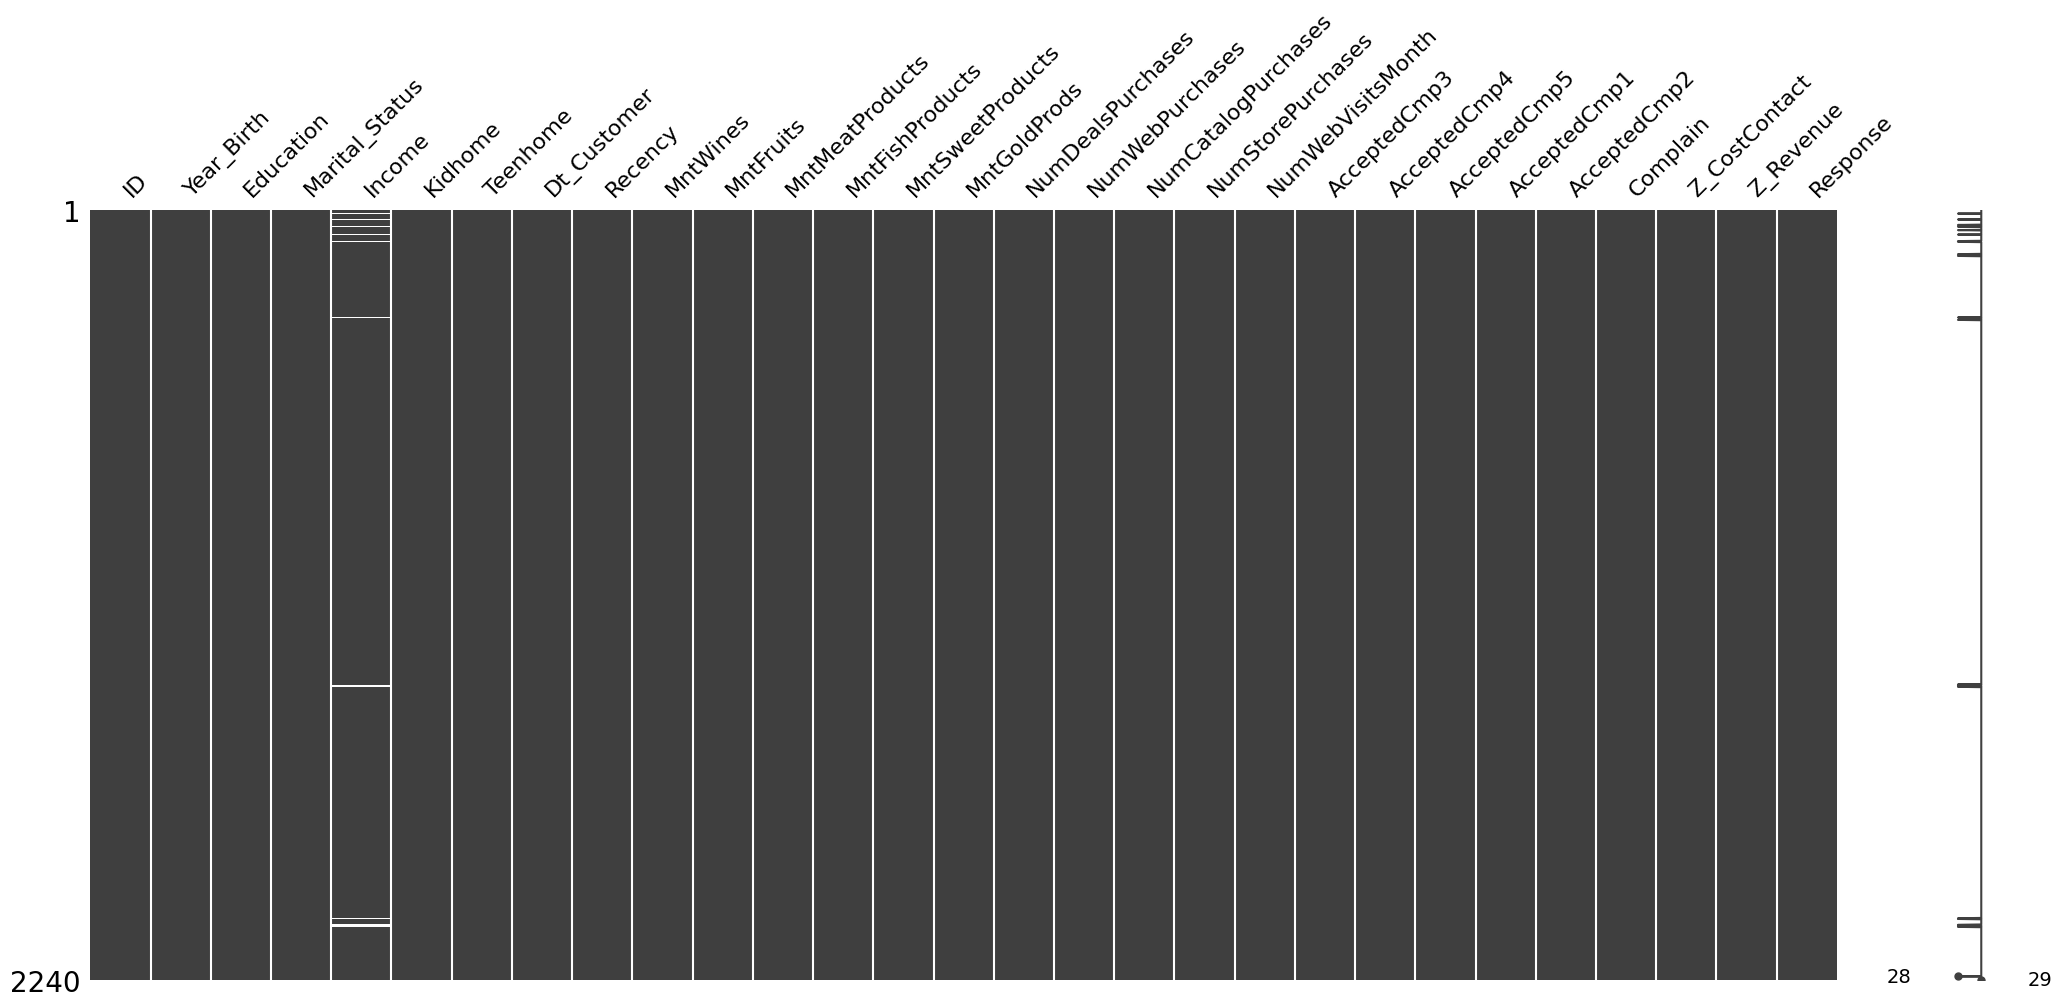

In [7]:
# check for missing values
msno.matrix(df)

In [8]:
missing_df = pd.DataFrame(df.isna().sum(), columns= ['count'])
missing_df["percentage"] = (missing_df["count"]/df.shape[0])*100
missing_df

,count,percentage
ID,0,0.000000
Year_Birth,0,0.000000
Education,0,0.000000
Marital_Status,0,0.000000
Income,24,1.071429
Kidhome,0,0.000000
Teenhome,0,0.000000
Dt_Customer,0,0.000000
Recency,0,0.000000
MntWines,0,0.000000


In [9]:
df[df["Income"].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,2013-11-15,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,2013-02-20,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,2013-11-05,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,2014-01-01,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,2013-06-17,57,11,...,6,0,0,0,0,0,0,3,11,0
71,10629,1973,2n Cycle,Married,NaN,1,0,2012-09-14,25,25,...,8,0,0,0,0,0,0,3,11,0
90,8996,1957,PhD,Married,NaN,2,1,2012-11-19,4,230,...,9,0,0,0,0,0,0,3,11,0
91,9235,1957,Graduation,Single,NaN,1,1,2014-05-27,45,7,...,7,0,0,0,0,0,0,3,11,0
92,5798,1973,Master,Together,NaN,0,0,2013-11-23,87,445,...,1,0,0,0,0,0,0,3,11,0
128,8268,1961,PhD,Married,NaN,0,1,2013-07-11,23,352,...,6,0,0,0,0,0,0,3,11,0


In [10]:
# replace missing values in Income with the mean of each group of Education
df["Income"] = df["Income"].fillna(df.groupby("Education")["Income"].transform("mean"))

In [11]:
df[df["Income"].isnull()]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


In [12]:
# check duplicates
df.duplicated().sum()

np.int64(0)

In [13]:
df.duplicated(subset=['ID']).sum()

np.int64(0)

In [14]:
# check unusual values
df.nunique()

ID                     2240
Year_Birth               59
Education                 5
Marital_Status            8
Income                 1978
Kidhome                   3
Teenhome                  3
Dt_Customer             663
Recency                 100
MntWines                776
MntFruits               158
MntMeatProducts         558
MntFishProducts         182
MntSweetProducts        177
MntGoldProds            213
NumDealsPurchases        15
NumWebPurchases          15
NumCatalogPurchases      14
NumStorePurchases        14
NumWebVisitsMonth        16
AcceptedCmp3              2
AcceptedCmp4              2
AcceptedCmp5              2
AcceptedCmp1              2
AcceptedCmp2              2
Complain                  2
Z_CostContact             1
Z_Revenue                 1
Response                  2
dtype: int64

In [15]:
# get the number of unique values is one which means those features are not useful
df[["Z_CostContact", "Z_Revenue"]]

,Z_CostContact,Z_Revenue
0,3,11
1,3,11
2,3,11
3,3,11
4,3,11
...,...,...
2235,3,11
2236,3,11
2237,3,11
2238,3,11


In [16]:
df.drop(columns=["Z_CostContact", "Z_Revenue"], inplace=True)

In [17]:
df.shape

(2240, 27)

## EDA

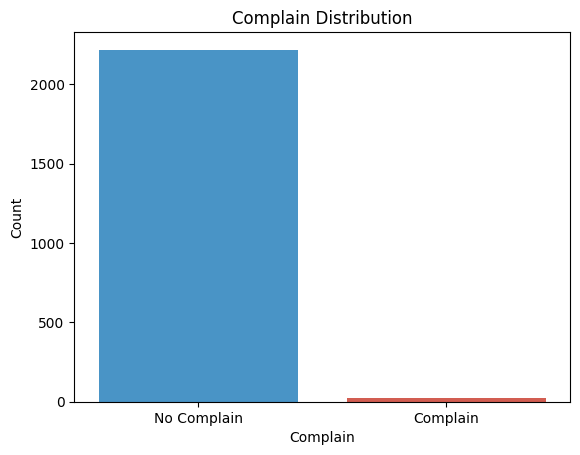

In [18]:
# Complain: 1 if customer complained in the last 2 years, 0 otherwise
custom_palette = ["#3498db", "#e74c3c"]
sns.countplot(data=df, x="Complain", palette=custom_palette)
plt.title('Complain Distribution')
plt.xticks([0, 1], ['No Complain', 'Complain'])
plt.xlabel('Complain')
plt.ylabel('Count')
plt.show()

* Only 0.9% of customers have complaint over the past two years.


In [19]:
# Response
df["Response"].value_counts()

Response
0    1906
1     334
Name: count, dtype: int64

In [20]:
df["Response"].value_counts(normalize=True)

Response
0    0.850893
1    0.149107
Name: proportion, dtype: float64

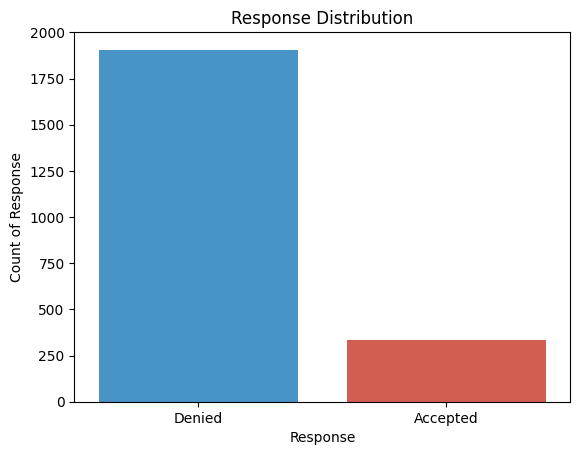

In [21]:
sns.countplot(x="Response", data=df, palette=custom_palette)
plt.title('Response Distribution')
plt.xticks([0, 1], ['Denied', 'Accepted'])
plt.xlabel('Response')
plt.ylabel('Count of Response')
plt.show()

* This indicates that the majority of recent promotions have been rejected by customers.

In [22]:
compaigns_accepted = df[["AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5"]].sum()
compaigns_accepted.sort_values(ascending=False)

AcceptedCmp4    167
AcceptedCmp5    163
AcceptedCmp3    163
AcceptedCmp1    144
AcceptedCmp2     30
dtype: int64

* This indicates that most promotions were rejected by customers; however, the fourth promotion had the highest acceptance rate, followed by promotions 5, 3, 1, and 2

In [23]:
# Marital_Status
df["Marital_Status"].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [24]:
df["Marital_Status"] = df["Marital_Status"].apply(lambda x: "Couple" if x in ["Married", "Together"] else "Single")
df["Marital_Status"].value_counts()

Marital_Status
Couple    1444
Single     796
Name: count, dtype: int64

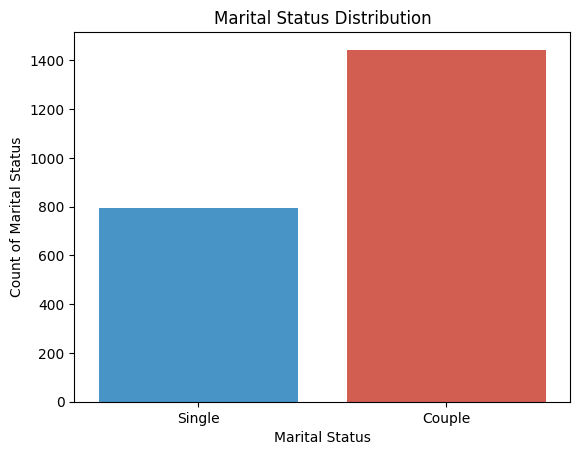

In [25]:
sns.countplot(x="Marital_Status", data=df, palette=custom_palette)
plt.title('Marital Status Distribution')
plt.xticks([0, 1], ['Single', 'Couple'])
plt.xlabel('Marital Status')
plt.ylabel('Count of Marital Status')
plt.show()

Text(0.5, 1.0, 'Correlation between Features')

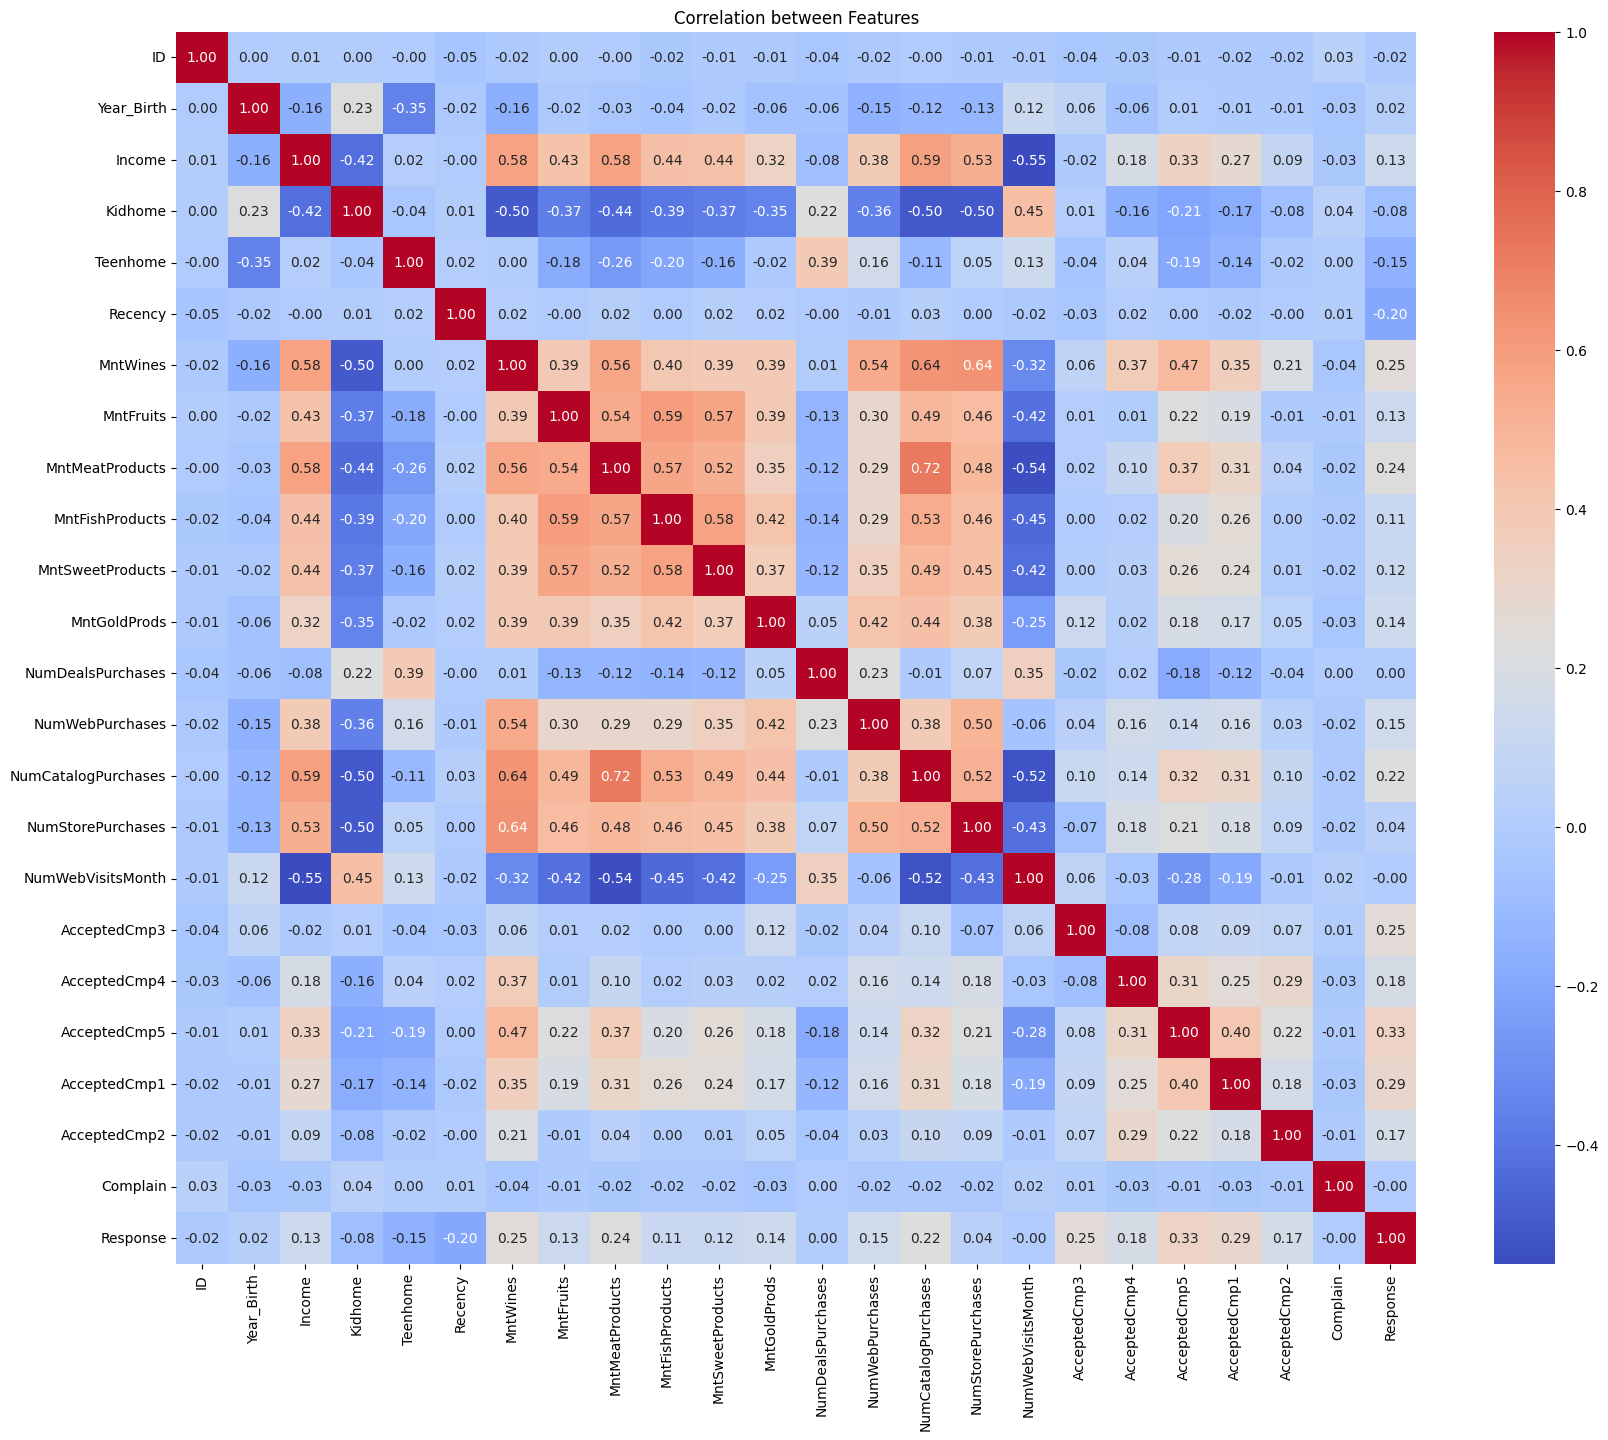

In [26]:
# correlation between features
plt.figure(figsize=(20, 16))
df_corr = df.select_dtypes(include="number").corr()
sns.heatmap(df_corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Features')

**Key Insight**
* The features Kidhome, NumWebPurchases, NumStorePurchases, MntWines, MntMeatProducts, and NumCatalogPurchases show high correlations with other variables. To reduce multicollinearity, we should consider dropping these features.


### Feature engineering 

In [27]:
# aggregate the features
df["Kids"] = df["Kidhome"] + df["Teenhome"]
df["Expense"] = df['MntWines'] + df['MntFruits'] + df['MntMeatProducts'] + df['MntFishProducts'] + df['MntSweetProducts'] + df['MntGoldProds']
df["TotalAcceptedCmp"] = df['AcceptedCmp1'] + df['AcceptedCmp2'] + df['AcceptedCmp3'] + df['AcceptedCmp4'] + df['AcceptedCmp5']
df["NumTotalPurchases"] = df['NumDealsPurchases'] + df['NumWebPurchases'] + df['NumCatalogPurchases'] + df['NumStorePurchases']
df.shape

(2240, 31)

In [28]:
remove_feats = ["AcceptedCmp1" , "AcceptedCmp2", "AcceptedCmp3" , "AcceptedCmp4","AcceptedCmp5", "Response","NumWebVisitsMonth", "NumWebPurchases","NumCatalogPurchases","NumStorePurchases","NumDealsPurchases" , "Kidhome", "Teenhome","MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]
df = df.drop(remove_feats, axis=1)
df.shape

(2240, 12)

In [29]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income',
       'Dt_Customer', 'Recency', 'Complain', 'Kids', 'Expense',
       'TotalAcceptedCmp', 'NumTotalPurchases'],
      dtype='object')

In [30]:
# get today's date
today = pd.to_datetime('today').date()
df["Age"] = today.year - df["Year_Birth"]
df["Age"].describe()

count    2240.000000
mean       55.194196
std        11.984069
min        28.000000
25%        47.000000
50%        54.000000
75%        65.000000
max       131.000000
Name: Age, dtype: float64

In [31]:
# create new feature engagement days
df["engagement_days"] = (pd.to_datetime('01-01-2015') - df["Dt_Customer"]).dt.days
df["engagement_days"]

0       849
1       299
2       498
3       325
4       347
       ... 
2235    567
2236    205
2237    341
2238    342
2239    808
Name: engagement_days, Length: 2240, dtype: int64

In [32]:
df=df.drop(columns=["ID", "Year_Birth", "Dt_Customer", "Recency", "Complain"],axis=1)
df

,Education,Marital_Status,Income,Kids,Expense,TotalAcceptedCmp,NumTotalPurchases,Age,engagement_days
0,Graduation,Single,58138.0,0,1617,0,25,67,849
1,Graduation,Single,46344.0,2,27,0,6,70,299
2,Graduation,Couple,71613.0,0,776,0,21,59,498
3,Graduation,Couple,26646.0,1,53,0,8,40,325
4,PhD,Couple,58293.0,1,422,0,19,43,347
...,...,...,...,...,...,...,...,...,...
2235,Graduation,Couple,61223.0,1,1341,0,18,57,567
2236,PhD,Couple,64014.0,3,444,1,22,78,205
2237,Graduation,Single,56981.0,0,1241,1,19,43,341
2238,Master,Couple,69245.0,1,843,0,23,68,342


In [33]:
df.shape

(2240, 9)

In [34]:
df["Education"] = df["Education"].apply(lambda x: "UG" if x == "Basic" else "PG")
df["Education"].value_counts()

Education
PG    2186
UG      54
Name: count, dtype: int64

In [35]:
## marital status & expenses
fig = px.bar(df, x='Marital_Status', y='Expense', color='Education')
fig.update_layout(title='Marital Status & Expenses')
fig.show()

In [36]:
fig = px.bar(df, x='Marital_Status', y='Expense', color="Marital_Status")
fig.update_layout(title='Marital Status & Expenses')
fig.show()

**Key Insight**
* Couples have significantly higher expenses compared to singles. This may indicate that couples, likely due to having dual incomes or family-related expenditures, tend to spend more.

In [37]:
fig = px.histogram(df, x="Expense", facet_row="Marital_Status", template="plotly_dark")
fig.update_layout(title='Marital Status & Expenses')
fig.show()

**Expense Distribution:**

- Both Single and Couple groups have a high concentration of individuals with lower expenses, as indicated by the sharp peak at the lower end (near zero) on the x-axis.
The distribution shows a long tail towards the right, meaning there are fewer people with higher expenses in both groups.

**Comparing Singles and Couples:**

- The distribution for couples has a higher count in the peak (around 400) compared to singles (around 200), suggesting that more individuals in the Couple category have low expenses.
Both groups follow a similar pattern, with expenses gradually decreasing in count as expenses increase

**Range of Expenses:**

- Most expenses for both groups are clustered between 0 and 500, with very few individuals reaching expenses beyond 2000.
Couples appear to have slightly more variation in expenses beyond 500 compared to singles, though the frequency remains low.

In [38]:
fig = px.histogram(df, x="Expense", facet_row="Education", template='plotly_dark')
fig.update_layout(title='Education & Expenses')
fig.show()

* Due to the limited UG data available, it’s challenging to identify any specific trends between PG and UG.







In [39]:
fig = px.histogram(df, x="Age", facet_row="Marital_Status", template='plotly_dark')
fig.update_layout(title='Marital Status & Age')
fig.show()

**Key Insight**
- Both the single and couple groups show a high concentration of individuals in the 45-55 age range. Additionally, for the couple group, there is a secondary peak in the 60-70 age range.

In [40]:
fig = px.histogram(df, x="Income", facet_row="Marital_Status", template='plotly_dark')
fig.update_layout(title='Marital Status & Income')
fig.show()

**Key Insight**
- Both the single and couple groups have similar distributions, with expenses concentrated between 30k and 80k

In [41]:
fig = px.pie(df, names="Marital_Status", title="Marital Status Distribution",  hole = 0.4, template = "gridon")
fig.show()

In [42]:
fig = px.pie(df, names="Education", title="Education Distribution",  hole = 0.4, template = "plotly_dark")
fig.show()

* 97% of our customers are from PG, while 2% are from UG.

Text(0.5, 1.0, 'Education & Expense')

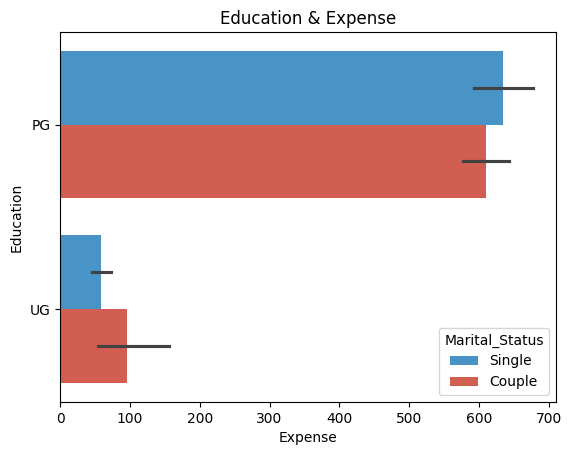

In [43]:
sns.barplot(x=df["Expense"], y=df["Education"], hue=df["Marital_Status"], palette=custom_palette)
plt.title('Education & Expense')

Text(0.5, 1.0, 'Education & Income')

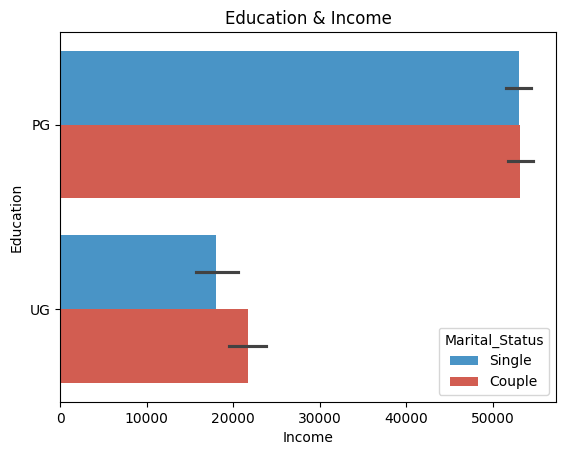

In [44]:
sns.barplot(x=df["Income"], y=df["Education"], hue=df["Marital_Status"], palette=custom_palette)
plt.title('Education & Income')

<Axes: >

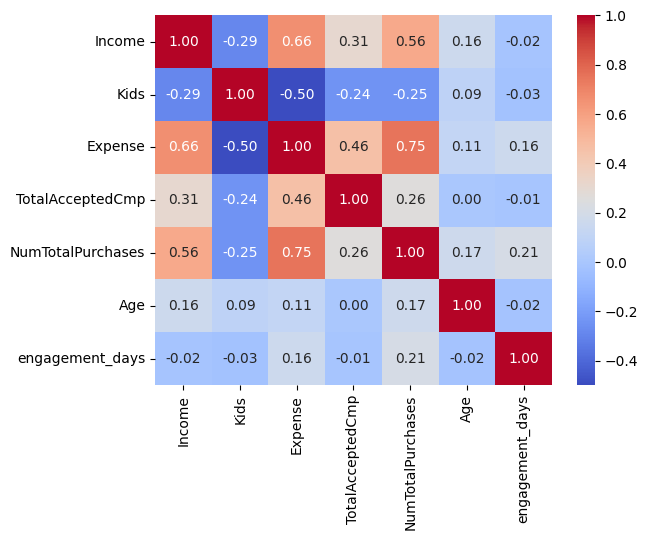

In [45]:
sns.heatmap(df.select_dtypes(exclude="object").corr(), annot=True, cmap='coolwarm', fmt=".2f")

In [46]:
preprocessed_data = df.copy()
preprocessed_data.to_csv('../data/preprocessed_data.csv', index=False)

In [47]:
preprocessed_data.head()

,Education,Marital_Status,Income,Kids,Expense,TotalAcceptedCmp,NumTotalPurchases,Age,engagement_days
0,PG,Single,58138.0,0,1617,0,25,67,849
1,PG,Single,46344.0,2,27,0,6,70,299
2,PG,Couple,71613.0,0,776,0,21,59,498
3,PG,Couple,26646.0,1,53,0,8,40,325
4,PG,Couple,58293.0,1,422,0,19,43,347


In [48]:
# ont hot encoding for Marital_Status
preprocessed_df = pd.get_dummies(preprocessed_data, columns=["Marital_Status", "Education"], drop_first=True)
preprocessed_df.head()

,Income,Kids,Expense,TotalAcceptedCmp,NumTotalPurchases,Age,engagement_days,Marital_Status_Single,Education_UG
0,58138.0,0,1617,0,25,67,849,True,False
1,46344.0,2,27,0,6,70,299,True,False
2,71613.0,0,776,0,21,59,498,False,False
3,26646.0,1,53,0,8,40,325,False,False
4,58293.0,1,422,0,19,43,347,False,False


In [49]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 2240 non-null   float64
 1   Kids                   2240 non-null   int64  
 2   Expense                2240 non-null   int64  
 3   TotalAcceptedCmp       2240 non-null   int64  
 4   NumTotalPurchases      2240 non-null   int64  
 5   Age                    2240 non-null   int64  
 6   engagement_days        2240 non-null   int64  
 7   Marital_Status_Single  2240 non-null   bool   
 8   Education_UG           2240 non-null   bool   
dtypes: bool(2), float64(1), int64(6)
memory usage: 127.0 KB


In [50]:
# preprocessed_df["Education"] = preprocessed_df["Education"].astype("category").cat.codes

In [51]:
preprocessed_df.columns

Index(['Income', 'Kids', 'Expense', 'TotalAcceptedCmp', 'NumTotalPurchases',
       'Age', 'engagement_days', 'Marital_Status_Single', 'Education_UG'],
      dtype='object')

In [52]:
preprocessed_df.head()

,Income,Kids,Expense,TotalAcceptedCmp,NumTotalPurchases,Age,engagement_days,Marital_Status_Single,Education_UG
0,58138.0,0,1617,0,25,67,849,True,False
1,46344.0,2,27,0,6,70,299,True,False
2,71613.0,0,776,0,21,59,498,False,False
3,26646.0,1,53,0,8,40,325,False,False
4,58293.0,1,422,0,19,43,347,False,False


In [53]:
st = StandardScaler()
scaled_data = st.fit_transform(preprocessed_df)
preprocessed_scaled_df = pd.DataFrame(scaled_data, columns=preprocessed_df.columns)
preprocessed_scaled_df.head()


,Income,Kids,Expense,TotalAcceptedCmp,NumTotalPurchases,Age,engagement_days,Marital_Status_Single,Education_UG
0,0.235061,-1.264505,1.679417,-0.439037,1.320826,0.985345,1.531185,1.346874,-0.157171
1,-0.236067,1.396361,-0.961275,-0.439037,-1.154596,1.235733,-1.190545,1.346874,-0.157171
2,0.773340,-1.264505,0.282673,-0.439037,0.799685,0.317643,-0.205773,-0.742460,-0.157171
3,-1.022933,0.065928,-0.918094,-0.439037,-0.894025,-1.268149,-1.061881,-0.742460,-0.157171
4,0.241253,0.065928,-0.305254,-0.439037,0.539114,-1.017761,-0.953012,-0.742460,-0.157171


## Modeling 

In [54]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(preprocessed_scaled_df)
preprocessed_df["Cluster"] = kmeans.labels_

  File "c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
  File "c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 505, in run
    with Popen(*popenargs, **kwargs) as process:
  File "c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 951, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\tingf\AppData\Local\Programs\Python\Python39\lib\subprocess.py", line 1420, in _execute_child
    hp, ht, pid, tid = _winapi.CreateProcess(executable, args,


In [55]:
preprocessed_df.head()

,Income,Kids,Expense,TotalAcceptedCmp,NumTotalPurchases,Age,engagement_days,Marital_Status_Single,Education_UG,Cluster
0,58138.0,0,1617,0,25,67,849,True,False,1
1,46344.0,2,27,0,6,70,299,True,False,2
2,71613.0,0,776,0,21,59,498,False,False,1
3,26646.0,1,53,0,8,40,325,False,False,0
4,58293.0,1,422,0,19,43,347,False,False,2


In [56]:
preprocessed_df["Cluster"].value_counts()

Cluster
1    922
2    665
0    653
Name: count, dtype: int64

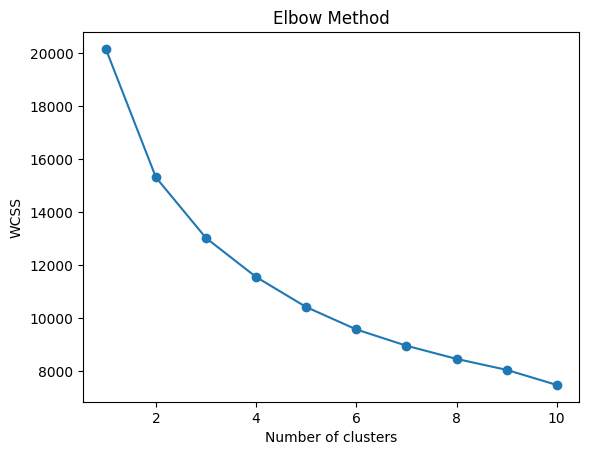

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(preprocessed_scaled_df)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

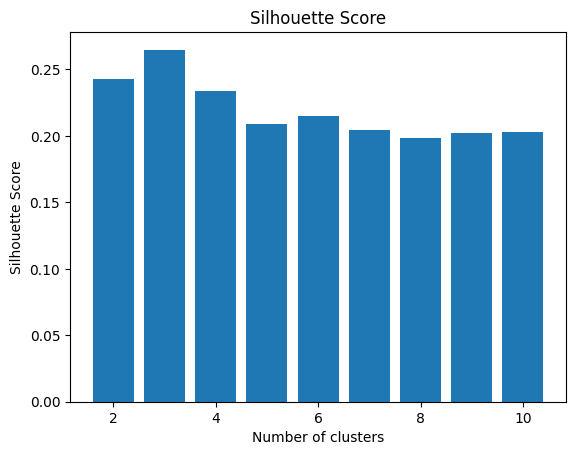

In [58]:
ss = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    c = kmeans.fit_predict(preprocessed_scaled_df)
    ss.append(silhouette_score(preprocessed_scaled_df, c))
plt.bar(range(2, 11), ss)
plt.title('Silhouette Score')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

In [62]:
## best models
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(preprocessed_scaled_df)
pred = kmeans.predict(preprocessed_scaled_df)
pred

array([1, 2, 1, ..., 1, 1, 2], dtype=int32)

In [72]:
preprocessed_df["Cluster"] = pred
preprocessed_df.head()

,Income,Kids,Expense,TotalAcceptedCmp,NumTotalPurchases,Age,engagement_days,Marital_Status_Single,Education_UG,Cluster
0,58138.0,0,1617,0,25,67,849,True,False,1
1,46344.0,2,27,0,6,70,299,True,False,2
2,71613.0,0,776,0,21,59,498,False,False,1
3,26646.0,1,53,0,8,40,325,False,False,0
4,58293.0,1,422,0,19,43,347,False,False,2


In [65]:
df["Cluster"].value_counts()

Cluster
1    922
2    665
0    653
Name: count, dtype: int64

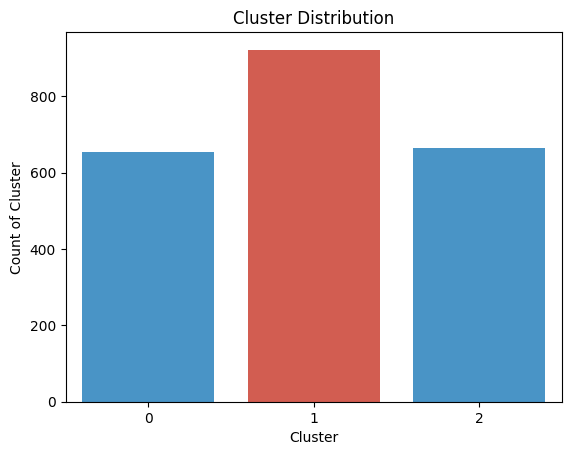

In [67]:
sns.countplot(x="Cluster", data=preprocessed_df, palette=custom_palette)
plt.title('Cluster Distribution')
plt.xlabel('Cluster')
plt.ylabel('Count of Cluster')
plt.show()

* As we can see here, there is more weight in cluster 1 compared to the other clusters.

In [76]:
preprocessed_df.head()

,Income,Kids,Expense,TotalAcceptedCmp,NumTotalPurchases,Age,engagement_days,Marital_Status_Single,Education_UG,Cluster
0,58138.0,0,1617,0,25,67,849,True,False,1
1,46344.0,2,27,0,6,70,299,True,False,2
2,71613.0,0,776,0,21,59,498,False,False,1
3,26646.0,1,53,0,8,40,325,False,False,0
4,58293.0,1,422,0,19,43,347,False,False,2


In [78]:
preprocessed_df["Marital_Status_Single"].value_counts()

Marital_Status_Single
False    1444
True      796
Name: count, dtype: int64

In [79]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Income                 2240 non-null   float64
 1   Kids                   2240 non-null   int64  
 2   Expense                2240 non-null   int64  
 3   TotalAcceptedCmp       2240 non-null   int64  
 4   NumTotalPurchases      2240 non-null   int64  
 5   Age                    2240 non-null   int64  
 6   engagement_days        2240 non-null   int64  
 7   Marital_Status_Single  2240 non-null   bool   
 8   Education_UG           2240 non-null   bool   
 9   Cluster                2240 non-null   int32  
dtypes: bool(2), float64(1), int32(1), int64(6)
memory usage: 135.8 KB


In [80]:
# convert bool to int for Marital_Status_Single
preprocessed_df["Marital_Status_Single"] = preprocessed_df["Marital_Status_Single"].astype(int)
preprocessed_df["Marital_Status_Single"].value_counts()

Marital_Status_Single
0    1444
1     796
Name: count, dtype: int64

In [81]:
preprocessed_df["Education_UG"] = preprocessed_df["Education_UG"].astype(int)
preprocessed_df["Education_UG"].value_counts()

Education_UG
0    2186
1      54
Name: count, dtype: int64

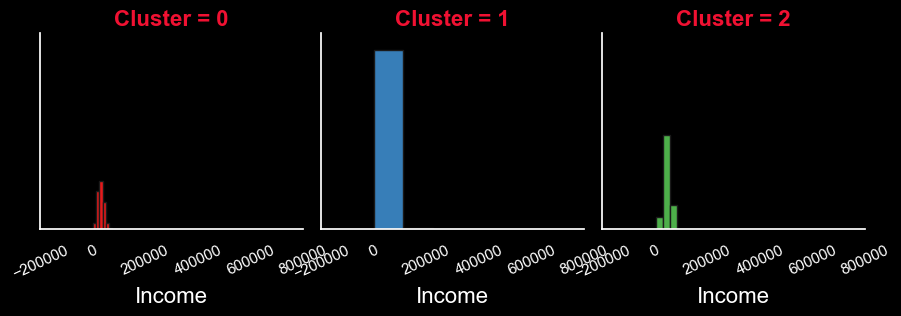

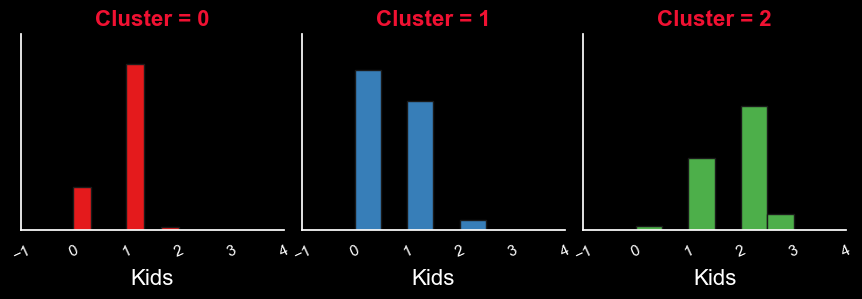

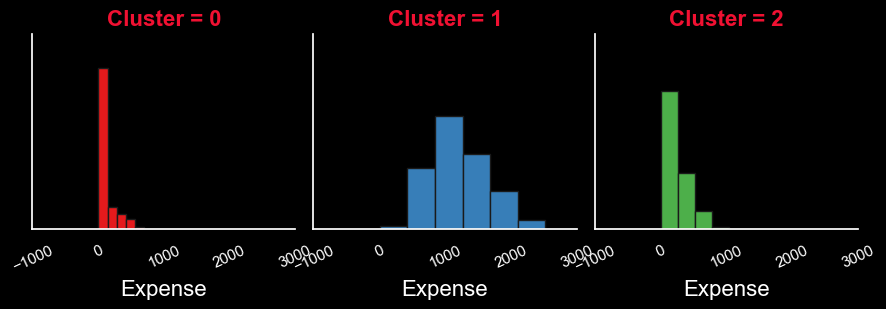

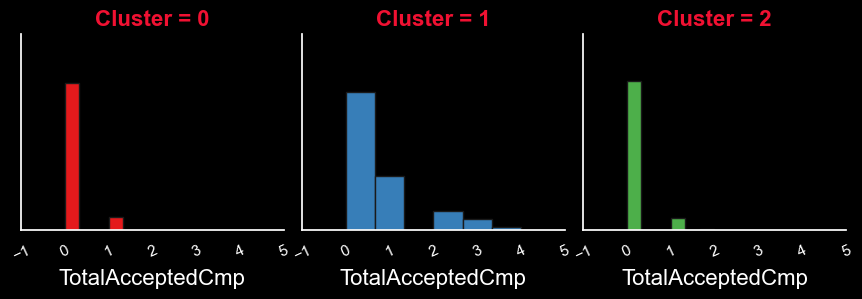

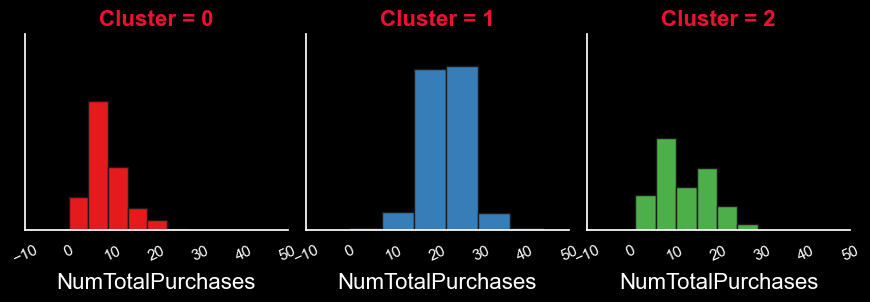

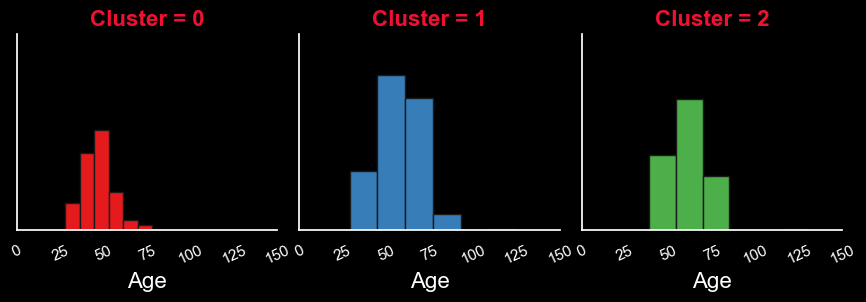

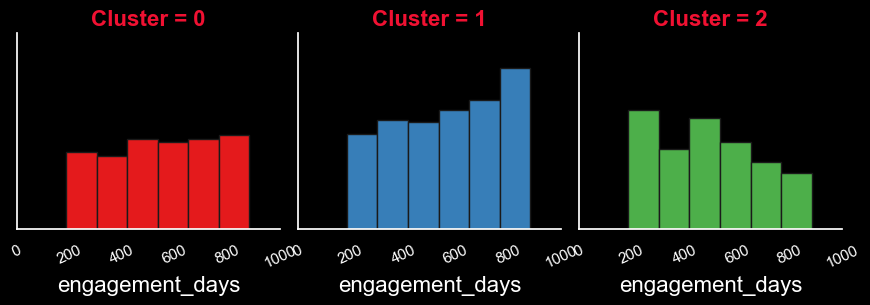

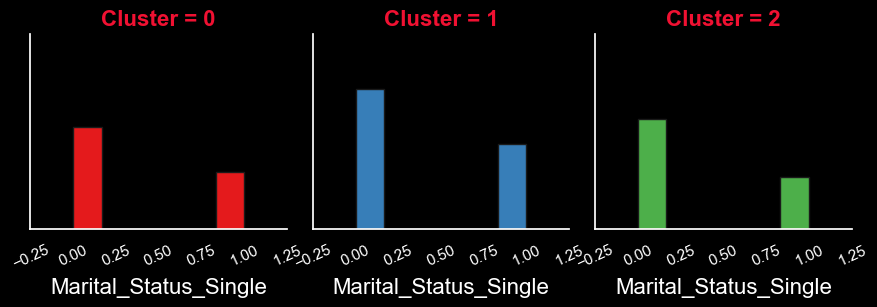

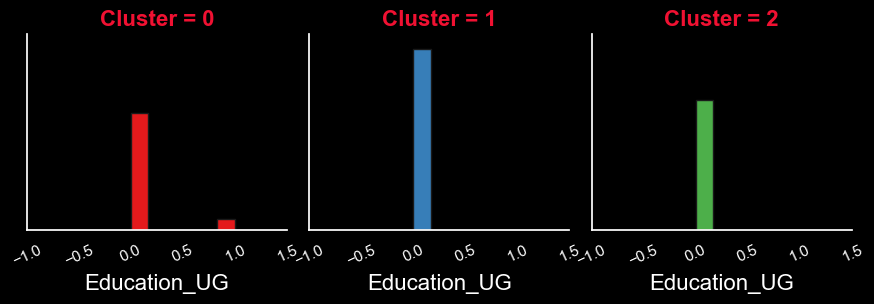

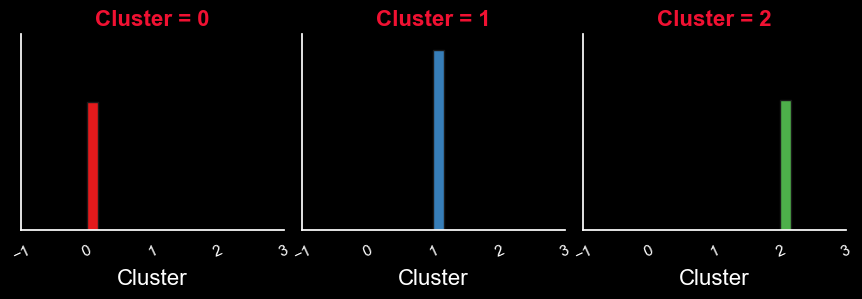

In [88]:
sns.set(rc={'axes.facecolor':'black', 'figure.facecolor':'black', 'axes.grid' : False})
for feats in preprocessed_df:
    diag = sns.FacetGrid(preprocessed_df, col="Cluster", hue="Cluster", palette="Set1")
    diag.map(plt.hist, feats, bins=6, ec="k")
    diag.set_xticklabels(rotation=25, color='white')
    diag.set_yticklabels(color='white')
    diag.set_xlabels(size=16, color='white')
    diag.set_titles(size=16, color='#f01132', fontweight="bold")

# **Report**

**Based on the above information, we can categorize the clients into three clusters:**

1. **Highly Active Customers**: These customers belong to **Cluster I**.
2. **Moderately Active Customers**: These customers belong to **Cluster II**.
3. **Least Active Customers**: These customers belong to **Cluster III**.

---

### **Characteristics of Highly Active Clients**

- **In Terms of Education**
  - Highly active clients primarily have a postgraduate (PG) background.

- **In Terms of Marital Status**
  - The number of people in relationships is approximately twice the number of single people.

- **In Terms of Income**
  - Highly active clients have slightly lower incomes than moderately active clients.

- **In Terms of Children**
  - Highly active customers have more children, averaging one child per customer.

- **In Terms of Costs**
  - Highly active customers have lower expenses compared to moderately active customers.
  - These customers spend an average of approximately 100–200 units of money.

- **In Terms of Age**
  - These customers range from 25 to 75 years old.
  - The upper age limit typically falls between 40 and 50 years.

- **In Terms of Engagement Duration**
  - Highly active customers are more loyal, showing longer periods of engagement with the company.

---

### **Characteristics of Moderately Active Customers**

- In Terms of Education
  - Moderately active customers primarily have a postgraduate (PG) background.

- **In Terms of Marital Status**
  - Slightly more customers are in relationships compared to those who are single.

- **In Terms of Income**
  - Moderately active clients have higher incomes than both highly active and least active clients.

- **In Terms of Children**
  - Moderately active clients have fewer children than highly active clients, with most having no children.

- **In Terms of Costs**
  - Moderately active clients incur higher expenses than highly active clients.
  - These clients spend an average of approximately 500–2000 units of money.

- **In Terms of Age**
  - These customers range from 25 to 75 years old.
  - The upper age limit typically falls between 35 and 60 years.

- **In Terms of Engagement Duration**
  - Moderately active customers show slightly less engagement with the company compared to highly active customers.
